In [1]:
import logging
from madminer.madminer import MadMiner, plot_nd_morphing_basis_scatter, plot_nd_morphing_basis_slices

/vols/cms/us322/nsbi_for_dihiggs/madminer/madminer/fisherinformation/geometry.py:349: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.dimension is not 2:


In [2]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
import yaml
with open("workflow.yaml", "r") as file:
    workflow = yaml.safe_load(file)

We use the SMEFT@NLO (https://feynrules.irmp.ucl.ac.be/wiki/SMEFTatNLO) model

Signal decay: gg -> H( -> b b~) H( -> a a)

For the time being, we'll focus on 3 parameters:

- cp (#5)
- cdp (#4)
- cpDC (#2)

## Input the SMEFT@NLO coefficients

In [4]:
miner = MadMiner()

miner.add_parameter(
    lha_block="DIM6",
    lha_id=5,
    parameter_name="cp",
    morphing_max_power=2,
    param_card_transform="theta",
    parameter_range=(-16, 8),
)


miner.add_parameter(
    lha_block="DIM6",
    lha_id=4,
    parameter_name="cdp",
    morphing_max_power=2,
    param_card_transform="theta",
    parameter_range=(-5, 6),
)

miner.add_parameter(
    lha_block="DIM62F",
    lha_id=19,
    parameter_name="ctp",
    morphing_max_power=2,
    param_card_transform="theta",
    parameter_range=(-6, 8),
)


19:40 madminer.madminer.co INFO    Adding parameter: cp (LHA: DIM6 5, Power: 2, Range: (-16, 8))
19:40 madminer.madminer.co WARNING Resetting benchmarks and morphing
19:40 madminer.madminer.co INFO    Adding parameter: cdp (LHA: DIM6 4, Power: 2, Range: (-5, 6))
19:40 madminer.madminer.co WARNING Resetting benchmarks and morphing
19:40 madminer.madminer.co INFO    Adding parameter: ctp (LHA: DIM62F 19, Power: 2, Range: (-6, 8))
19:40 madminer.madminer.co WARNING Resetting benchmarks and morphing


In [5]:
# Manually add in the SM benchmark

miner.add_benchmark({"cp": 0.0, "cdp": 0.0, "ctp": 0.0}, "sm")

19:40 madminer.madminer.co INFO    Added benchmark sm: cp = 0.00e+00, cdp = 0.00e+00, ctp = 0.00e+00


In [6]:
# Choose an optimal set of non-SM benchmarks over many trials

miner.set_morphing(include_existing_benchmarks=True,
                   max_overall_power=2,
                   n_trials=10000,
                    n_test_thetas=1000)

19:40 madminer.madminer.co INFO    Optimizing basis for morphing
19:44 madminer.madminer.co INFO    Set up morphing with 3 parameters, 10 morphing components, 1 predefined basis points, and 9 new basis points


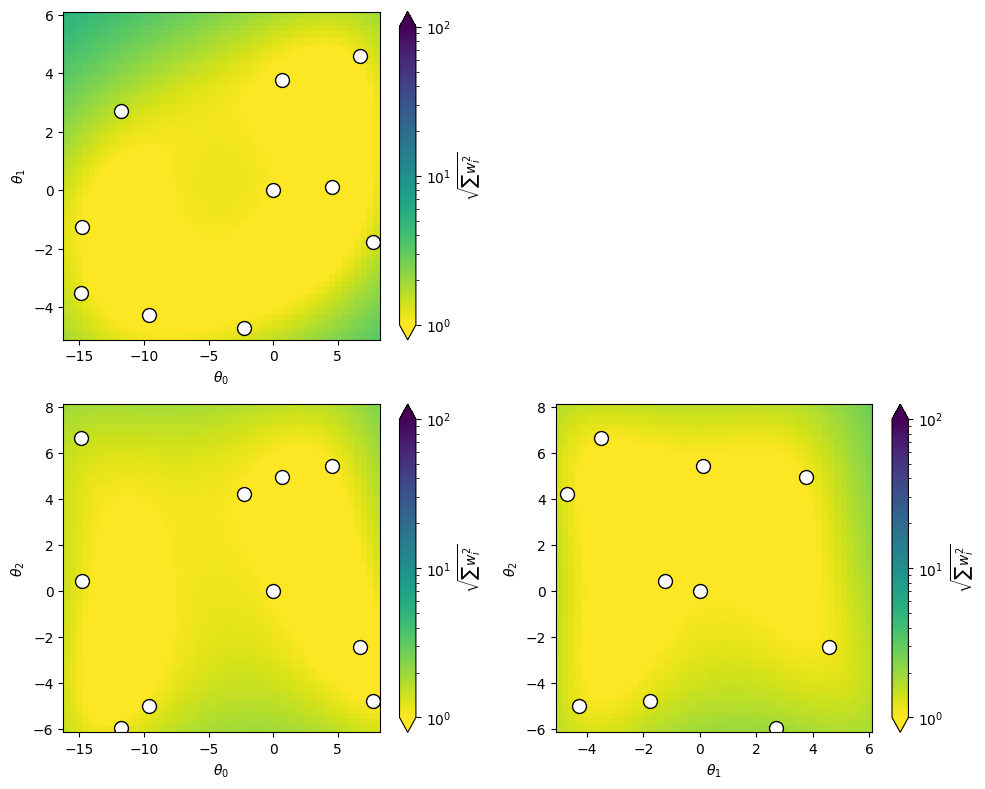

In [7]:
fig = plot_nd_morphing_basis_slices(miner.morpher)

In [8]:
# Save out the benchmarks file

miner.save(workflow["morphing_setup"], )

19:44 madminer.madminer.co INFO    Saving setup (including morphing) to /vols/cms/us322/nsbi_for_dihiggs/data/setup.h5
